In [2]:
import openturns as ot
import numpy as np
import matplotlib.pyplot as plt

from truncatedDistribution import TruncatedDistribution
from normal import Normal
from gumbel import Gumbel
from beta import Beta
from lognormal import LogNormal
from extendedtrnormal import ExtendedTrNormal

/tmp/ipykernel_1318960/4152894024.py:3: RuntimeWarning: invalid value encountered in scalar power
  return -0.005*(x**4 +10*x**3+20*x**2+x +2 +160)*x_**(0.5) + 2


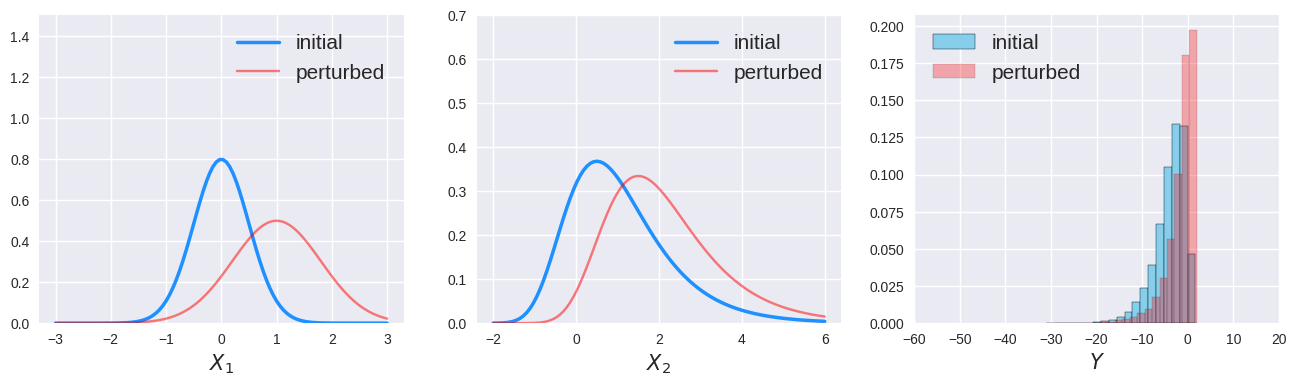

In [28]:
def G(x_p, x_):
    x = x_p-9
    return -0.005*(x**4 +10*x**3+20*x**2+x +2 +160)*x_**(0.5) + 2


def sample_array(sample):
    sample_arr = np.array(sample).transpose()[0]
    return sample_arr


fig, ax = plt.subplots(1, 3, figsize=(16,4))
plt.style.use('seaborn-v0_8')

X1 = np.linspace(-3, 3, 100)
X2 = np.linspace(-2, 6, 100)

f1 = ot.Normal(0, 0.5)
f2 = ot.Gumbel(1, 0.5)


sample_1 = sample_array(f1.getSample(200))
sample_2 = sample_array(f2.getSample(200))

ax[0].plot(X1, [f1.computePDF(x) for x in X1], color="dodgerblue", label="initial", lw=2.5)
ax[0].set_ylim(0, 1.5)
ax[0].set_xlabel(r"$X_1$", fontsize=15)
# ax[0].tick_params(axis='x', labelsize=14)
# ax[0].tick_params(axis='y', labelsize=14)

ax[1].plot(X2, [f2.computePDF(x) for x in X2], color="dodgerblue", label ="initial", lw=2.5)
ax[1].set_ylim(0, 0.7)
ax[1].set_xlabel(r"$X_2$", fontsize=15)
#ax[1].set_xlim(-3, 5)

ax[2].hist([G(x_p, x) for x_p in sample_1 for x in sample_2], bins=19, density=True, color='skyblue', edgecolor = 'black', label='initial')
ax[2].set_xlabel(r"$Y$", fontsize=15)
ax[2].set_xlim(-60,20);
#fig.savefig("")

# the perturbed distributions

f1_p = ot.Normal(1, 0.8)
ax[0].plot(X1, [f1_p.computePDF(x) for x in X1], color="red", label="perturbed", alpha=0.5)

ax[0].legend(fontsize=15)

f2_p = ot.Gumbel(1.1, 1.5)
ax[1].plot(X2, [f2_p.computePDF(x) for x in X2], color="red", label="perturbed", alpha=0.5)
ax[1].legend(fontsize=15)

sample_1_p = sample_array(f1_p.getSample(200))
sample_2_p = sample_array(f2_p.getSample(200))

ax[2].hist([G(x_p, x) for x_p in sample_1_p for x in sample_2_p], bins=19, density=True, color='red', edgecolor = 'black', alpha=0.3, label='perturbed')
ax[2].legend(fontsize=15);

#fig.savefig('/home/bketema/Downloads/Figures_EYSM/input_output_relation_perturbed.pdf', dpi=600, bbox_inches='tight')

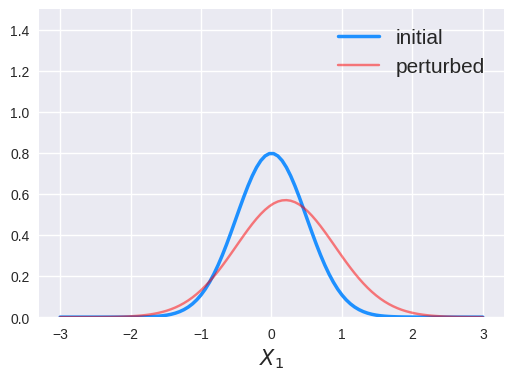

In [167]:

plt.figure(figsize=(6, 4))
plt.plot(X1, [f1.computePDF(x) for x in X1], color="dodgerblue", label="initial", lw=2.5)
plt.ylim(0, 1.5)
plt.xlabel(r"$X_1$", fontsize=15)
# plt.tick_params(axis='x', labelsize=14)
# plt.tick_params(axis='y', labelsize=14)

# the perturbed distributions

f1_p = ot.Normal(0.2, 0.7)
plt.plot(X1, [f1_p.computePDF(x) for x in X1], color="red", label="perturbed", alpha=0.5)

plt.legend(fontsize=15)
plt.savefig('/home/bketema/Downloads/Figures_EYSM/single_perturbation_normal.pdf', dpi=600, bbox_inches='tight')

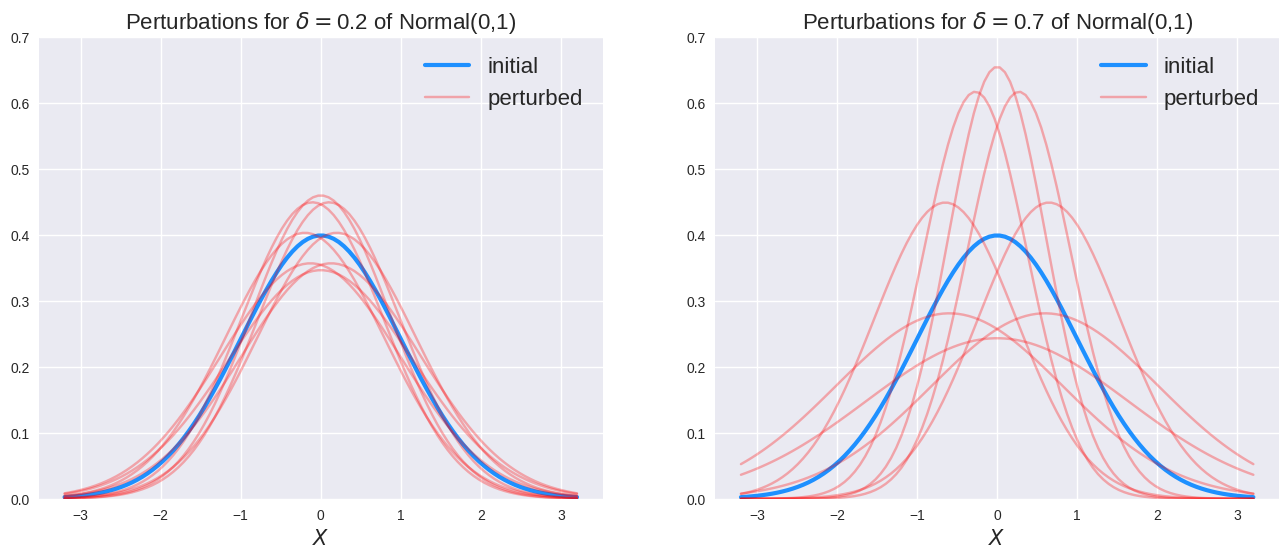

In [174]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

Delta = [0.2, 0.7]

f = Normal(0, 1)
X = np.linspace(-3.2, 3.2, 100)

for i in range(2):
    ax[i].set_title(r"Perturbations for $\delta=$"+str(Delta[i])+r" of Normal(0,1)", fontsize=16)
    ax[i].set_xlabel(r"$X$", fontsize=15)

    ax[i].set_ylim(0, 0.7)
    ax[i].plot(X, [f.computePDF(x) for x in X], lw=3, label="initial", color='dodgerblue')
    perturbedDist = f.sampleFisherRaoSphere(Delta[i], nbPts=8, h=0.005)
    for dist in perturbedDist:
        ax[i].plot(X, [dist.computePDF(x) for x in X], color="red", alpha=0.3)
    ax[i].plot([],[], color="red", alpha=0.3, label="perturbed")

    ax[i].legend(fontsize = 16)


fig.savefig('/home/bketema/Downloads/Figures_EYSM/perturbation_normal.pdf', dpi=600, bbox_inches='tight')

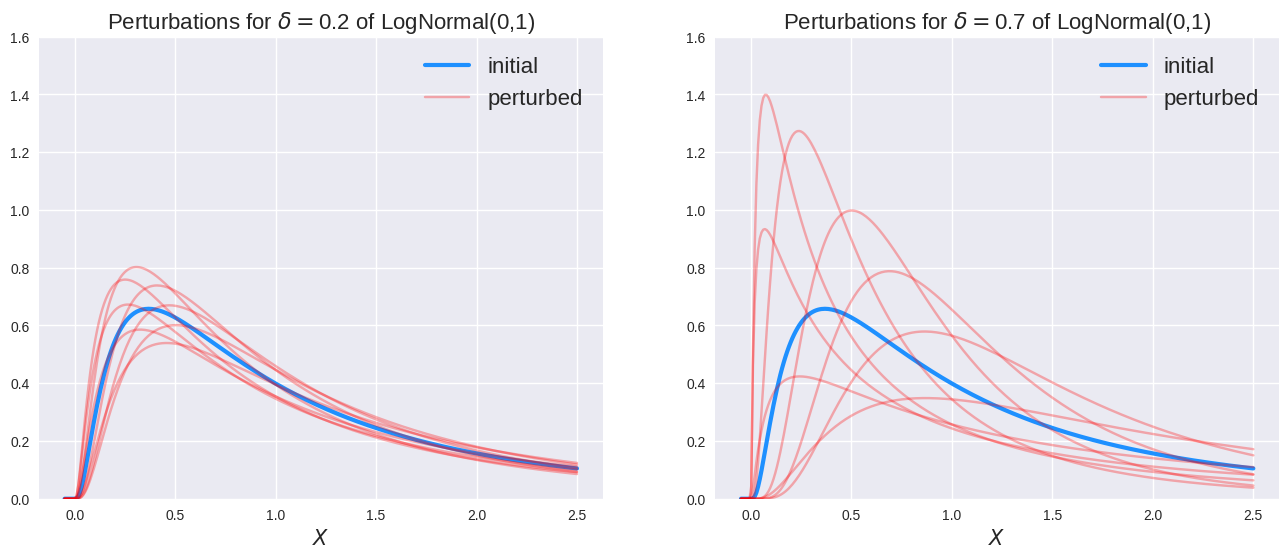

In [175]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

Delta = [0.2, 0.7]

f = LogNormal(0, 1)
X = np.linspace(-0.05, 2.5, 300)

for i in range(2):
    ax[i].set_title(r"Perturbations for $\delta=$"+str(Delta[i])+r" of LogNormal(0,1)", fontsize=16)
    ax[i].set_xlabel(r"$X$", fontsize=15)

    ax[i].set_ylim(0, 1.6)
    ax[i].plot(X, [f.computePDF(x) for x in X], lw=3, label="initial", color='dodgerblue')
    perturbedDist = f.sampleFisherRaoSphere(Delta[i], nbPts=8)
    for dist in perturbedDist:
        ax[i].plot(X, [dist.computePDF(x) for x in X], color="red", alpha=0.3)
    ax[i].plot([],[], color="red", alpha=0.3, label="perturbed")

    ax[i].legend(fontsize = 16)

fig.savefig('/home/bketema/Downloads/Figures_EYSM/perturbation_lognormal.pdf', dpi=600, bbox_inches='tight')

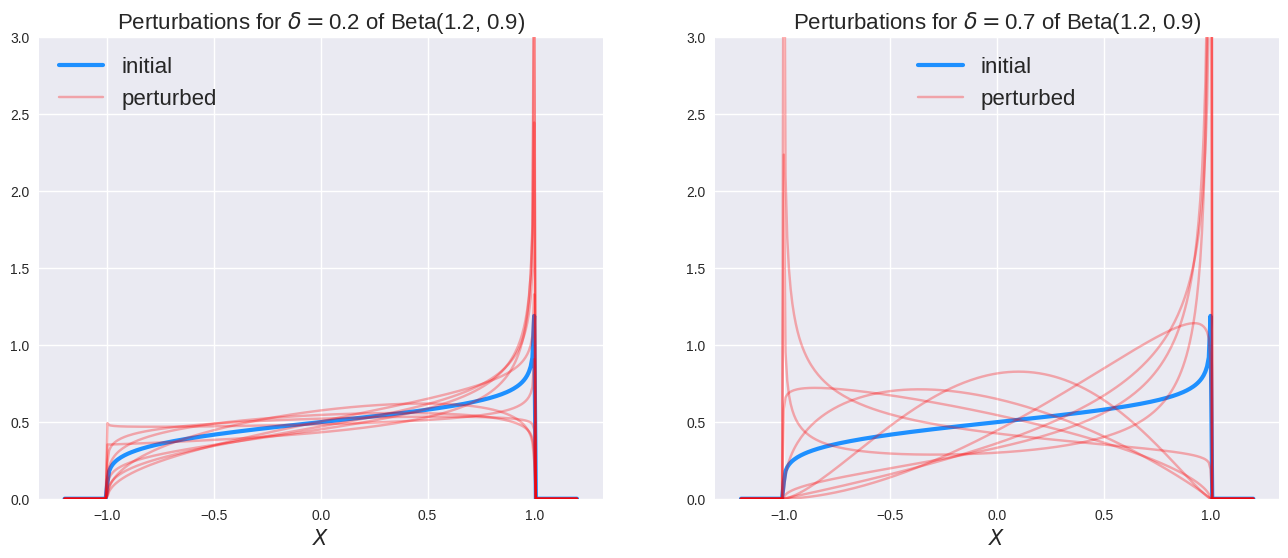

In [176]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

Delta = [0.2, 0.7]

f = Beta(1.2, 0.9, -1, 1)
X = np.linspace(-1.2, 1.2, 300)

for i in range(2):
    ax[i].set_title(r"Perturbations for $\delta=$"+str(Delta[i]) +r" of Beta(1.2, 0.9)", fontsize=16)
    ax[i].set_xlabel(r"$X$", fontsize=15)

    ax[i].set_ylim(0, 3)
    ax[i].plot(X, [f.computePDF(x) for x in X], lw=3, label="initial", color='dodgerblue')
    perturbedDist = f.sampleFisherRaoSphere(Delta[i], nbPts=8)
    for dist in perturbedDist:
        ax[i].plot(X, [dist.computePDF(x) for x in X], color="red", alpha=0.3)
    ax[i].plot([],[], color="red", alpha=0.3, label="perturbed")

    ax[i].legend(fontsize = 16)

fig.savefig('/home/bketema/Downloads/Figures_EYSM/perturbation_beta.pdf', dpi=600, bbox_inches='tight')